# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [1]:
# theta needs to be in radians
# sin and cos are not part of phython

from math import sin, cos, pi, radians

In [2]:
radians(90)

1.5707963267948966

In [9]:
theta=radians(25)
sigma_x=12
sigma_y=-5.5
tau_xy=3.5
sigma_xp=sigma_x*cos(theta)**2+sigma_y*sin(theta)**2+2*tau_xy*sin(theta)*cos(theta)
sigma_yp=sigma_x*sin(theta)**2+sigma_y*cos(theta)**2-2*tau_xy*sin(theta)*cos(theta)
tau_xyp=(sigma_y-sigma_x)*sin(theta)*cos(theta)+tau_xy*(cos(theta)**2-sin(theta)**2)
print(sigma_xp)
print(sigma_yp)
print(tau_xyp)

11.555547135673642
-5.055547135673642
-4.453132243388171


### Exercise 2

Convert the calculation from exercise 1 to a function

In [83]:
def stressTransform(sigma_x, sigma_y, tau_xy, theta):
    # YOUR CODE
    sigma_xp=sigma_x*cos(theta)**2+sigma_y*sin(theta)**2+2*tau_xy*sin(theta)*cos(theta)
    sigma_yp=sigma_x*sin(theta)**2+sigma_y*cos(theta)**2-2*tau_xy*sin(theta)*cos(theta)
    tau_xyp=(sigma_y-sigma_x)*sin(theta)*cos(theta)+tau_xy*(cos(theta)**2-sin(theta)**2)
    return (sigma_xp,sigma_yp,tau_xyp)

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [84]:
stressTransform(12,-5.5,3.5,0)

(12.0, -5.5, 3.5)

In [62]:
stressTransform(12,-5.5,3.5,25)

(10.775140761342241, -4.27514076134224, 5.673161069631774)

In [63]:
stressTransform(12,-5.5,3.5,180)

(4.123907981442958, 2.3760920185570416, -9.383431400078027)

### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [64]:
import numpy as np
import pandas as pd
thetas=np.linspace(0,180,81)
print(thetas)
sigmax_values = []
sigmay_values = []
tauxy_values = [] 
stress=stressTransform(sigma_x, sigma_y, tau_xy, thetas)
pd.DataFrame(stress,columns=['Theta','Sigma X','Sigma Y','Tau_xy'])
# YOUR CODE HERE

[  0.     2.25   4.5    6.75   9.    11.25  13.5   15.75  18.    20.25
  22.5   24.75  27.    29.25  31.5   33.75  36.    38.25  40.5   42.75
  45.    47.25  49.5   51.75  54.    56.25  58.5   60.75  63.    65.25
  67.5   69.75  72.    74.25  76.5   78.75  81.    83.25  85.5   87.75
  90.    92.25  94.5   96.75  99.   101.25 103.5  105.75 108.   110.25
 112.5  114.75 117.   119.25 121.5  123.75 126.   128.25 130.5  132.75
 135.   137.25 139.5  141.75 144.   146.25 148.5  150.75 153.   155.25
 157.5  159.75 162.   164.25 166.5  168.75 171.   173.25 175.5  177.75
 180.  ]


TypeError: only size-1 arrays can be converted to Python scalars

In [65]:
thetas=[]
for i in range(81):
    thetas.append(180*i/80)
sigmax_values = []
sigmay_values = []
tauxy_values = []
print('  Theta   Sigma X  Sigma Y  Tau XY')
for i in range(81):
    stress=stressTransform(sigma_x, sigma_y, tau_xy, thetas[i])
    sigmax_values.append(stress[0])
    sigmay_values.append(stress[1])
    tauxy_values.append(stress[2])
    print("{:8.2f}{:8.2f}{:8.2f}{:8.2f}".format(thetas[i],sigmax_values[i],sigmay_values[i],tauxy_values[i]))
    
# YOUR CODE HERE

  Theta   Sigma X  Sigma Y  Tau XY
    0.00   12.00   -5.50    3.50
    2.25   -2.02    8.52    7.82
    4.50   -3.28    9.78   -6.79
    6.75   11.27   -4.77   -4.95
    9.00    6.40    0.10    8.88
   11.25   -6.10   12.60    1.21
   13.50    4.04    2.46   -9.39
   15.75   12.26   -5.76    2.75
   18.00   -1.34    7.84    8.23
   20.25   -3.83   10.33   -6.22
   22.50   10.82   -4.32   -5.61
   24.75    7.13   -0.63    8.59
   27.00   -5.96   12.46    1.99
   29.25    3.25    3.25   -9.42
   31.50   12.46   -5.96    1.99
   33.75   -0.63    7.13    8.59
   36.00   -4.33   10.83   -5.61
   38.25   10.33   -3.83   -6.22
   40.50    7.84   -1.34    8.23
   42.75   -5.76   12.26    2.75
   45.00    2.46    4.04   -9.39
   47.25   12.60   -6.10    1.21
   49.50    0.10    6.40    8.88
   51.75   -4.77   11.27   -4.95
   54.00    9.78   -3.28   -6.80
   56.25    8.52   -2.02    7.82
   58.50   -5.50   12.00    3.50
   60.75    1.67    4.83   -9.29
   63.00   12.66   -6.16    0.42
   65.25

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

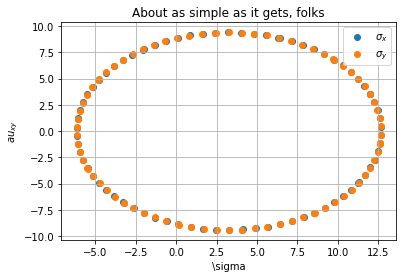

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
sigmax_values=np.array(sigmax_values)
sigmay_values=np.array(sigmay_values)
tauxy_values=np.array(tauxy_values)
t=sigmax_values
s=tauxy_values
fig, ax = plt.subplots()
ax.scatter(t, s)
ax.scatter(sigmay_values,-tauxy_values)

ax.set(xlabel='\sigma', ylabel='$\tau_{xy}$',
       title='About as simple as it gets, folks')
ax.grid()
ax.legend(('$\sigma_x$','$\sigma_y$'))

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [85]:
def stressTransform2(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    stress2={'sigx': stress[0],
            'sigy': stress[1],
            'tau': stress[2]}
    return stress2

In [87]:
stressTransform2([12,-5.5,3.5],0)

{'sigx': 12, 'sigy': -5.5, 'tau': 3.5}

## Homework questions

We can all learn from your questions!